In [1]:
import pandas as pd

# Training stuff
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ( 
    mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score,
    precision_score, recall_score, accuracy_score, f1_score, log_loss)

# Visual
import plotly.express as px

# 1. Train 4 different classifiers using sklearn library to predict "Activity" (biological response of the molecule) field from the "bioresponse.csv" dataset:
# - small decision tree;
# - deep decision tree;
# - random forest on small trees;
# - random forest on deep trees;

# Refer to Random_Forrest.ipynb and Decision_Trees.ipynb notebooks for examples. Split the data to train and test as 75%/25%.

In [2]:
bioresponce_df = pd.read_csv(
    "/data/notebook_files/bioresponse.csv",
    encoding="utf-8",
    on_bad_lines="skip",
)

In [3]:
bioresponce_df.describe

<bound method NDFrame.describe of       Activity        D1        D2    D3   D4        D5        D6        D7  \
0            1  0.000000  0.497009  0.10  0.0  0.132956  0.678031  0.273166   
1            1  0.366667  0.606291  0.05  0.0  0.111209  0.803455  0.106105   
2            1  0.033300  0.480124  0.00  0.0  0.209791  0.610350  0.356453   
3            1  0.000000  0.538825  0.00  0.5  0.196344  0.724230  0.235606   
4            0  0.100000  0.517794  0.00  0.0  0.494734  0.781422  0.154361   
...        ...       ...       ...   ...  ...       ...       ...       ...   
3746         1  0.033300  0.506409  0.10  0.0  0.209887  0.633426  0.297659   
3747         1  0.133333  0.651023  0.15  0.0  0.151154  0.766505  0.170876   
3748         0  0.200000  0.520564  0.00  0.0  0.179949  0.768785  0.177341   
3749         1  0.100000  0.765646  0.00  0.0  0.536954  0.634936  0.342713   
3750         0  0.133333  0.533952  0.00  0.0  0.347966  0.757971  0.230667   

            D8   

In [4]:
bioresponce_df.columns

Index(['Activity', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9',
       ...
       'D1767', 'D1768', 'D1769', 'D1770', 'D1771', 'D1772', 'D1773', 'D1774',
       'D1775', 'D1776'],
      dtype='object', length=1777)

In [5]:
X = bioresponce_df.drop(columns=["Activity"])
y = bioresponce_df["Activity"]

# X_test = test_df.loc[:,"D1":"D1776"]
# y_test = test_df[["Activity"]]

In [6]:
X_train,X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,  # from the description
    random_state=42, # its just based
)

## Decision tree
```python
max_depth: int, default=None
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
```

### small decision tree;

In [7]:
small_tree_classifier = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=10,
)

small_tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

[Text(186.78551785714288, 207.55636363636364, 'D27 <= 0.5\nentropy = 0.997\nsamples = 2813\nvalue = [1314, 1499]'),
 Text(92.69775, 187.7890909090909, 'D78 <= 0.037\nentropy = 0.869\nsamples = 1362\nvalue = [967, 395]'),
 Text(61.22057142857143, 168.0218181818182, 'D9 <= 0.735\nentropy = 0.753\nsamples = 1059\nvalue = [830, 229]'),
 Text(38.26285714285714, 148.25454545454545, 'D1131 <= 0.5\nentropy = 0.871\nsamples = 562\nvalue = [398, 164]'),
 Text(18.653142857142857, 128.48727272727274, 'D198 <= 0.32\nentropy = 0.784\nsamples = 437\nvalue = [335, 102]'),
 Text(7.652571428571429, 108.72, 'D26 <= 0.739\nentropy = 0.678\nsamples = 341\nvalue = [280, 61]'),
 Text(5.739428571428572, 88.95272727272729, 'entropy = 0.0\nsamples = 51\nvalue = [51, 0]'),
 Text(9.565714285714286, 88.95272727272729, 'D212 <= 0.75\nentropy = 0.742\nsamples = 290\nvalue = [229, 61]'),
 Text(7.652571428571429, 69.18545454545455, 'D215 <= 0.842\nentropy = 0.715\nsamples = 285\nvalue = [229, 56]'),
 Text(5.7394285714

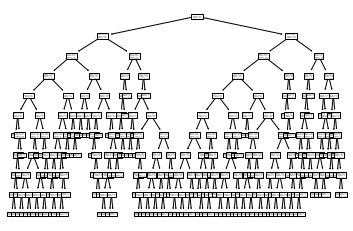

In [8]:
from sklearn.tree import plot_tree
plot_tree(small_tree_classifier, feature_names=X.columns)

In [9]:
small_tree_predictions = small_tree_classifier.predict(X_test)

### deep decision tree;

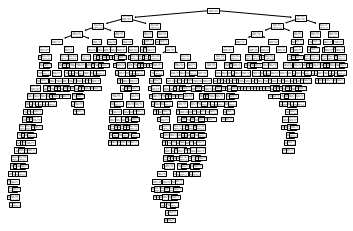

In [10]:
big_tree_classifier = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=None, # default
)

big_tree_classifier.fit(X_train, y_train)

plot_tree(big_tree_classifier, feature_names=X.columns)
big_tree_predictions = big_tree_classifier.predict(X_test)

## Random forest
```py
n_estimatorsint, default=100
The number of trees in the forest.

max_depthint, default=None
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
```

### random forest on small trees;

In [27]:
small_forrest_classifier = RandomForestClassifier(
    n_estimators=50,    #
    max_depth=2,        #
    random_state=1,     #
)

small_forrest_classifier.fit(X_train, y_train)
small_forrest_predictions = small_forrest_classifier.predict(X_test)

### random forest on deep trees;

In [12]:
forrest_classifier = RandomForestClassifier(
    n_estimators=50,    #
    max_depth=10,       #
    random_state=1,     #
)

forrest_classifier.fit(X_train, y_train)
forrest_classifier_predictions = forrest_classifier.predict(X_test)

# 2. Calculate the following metrics to check the quality of your models:
# - precision;
# - recall;
# - accuracy;
# - F1-score;
# - log-loss;

In [21]:
def getMetrics(y_test, y_pred):
    print(f"Precision {precision_score(y_test, y_pred)}")
    print(f"Recall    {recall_score(y_test, y_pred)}")
    print(f"Accuracy  {accuracy_score(y_test, y_pred)}")
    print(f"F1        {f1_score(y_test, y_pred)}")
    print(f"~~~~~~~~~")
    print(f"MAE       {mean_absolute_error(y_test, y_pred)}")
    print(f"MAE       {mean_absolute_error(y_test, y_pred)}")
    print(f"MAPE      {mean_absolute_percentage_error(y_test, y_pred)}")
    print(f"MSE       {mean_squared_error(y_test, y_pred)}")
    # squaredbool, default=True
    # If True returns MSE value, if False returns RMSE value.
    print(f"RMSE      {mean_squared_error(y_test, y_pred, squared=False)}")
    print(f"R2 score  {r2_score(y_test, y_pred)}")
    print(f"!INCORRECT LogLoss   {log_loss(y_test, y_pred)}") # < Wrong evaluation of log-loss.

As it was said in the lecture:
Log_loss
Log_loss calculates the likelihood of the labels in actual with the probabilities from predicted, taken with the opposite sign:
$\log_{loss}(ac t u a l , p r e d i c t e d ) = −\dfrac{1}{n} ∑^n_{i = 1} ( a c t u a l _i ⋅ \log ( p r e d i c t e d _i ) + ( 1 − a c t u a l _i ) ⋅ \log ( 1 − p r e d i c t e d_i ) )$

is the length of vectors.

Accordingly, this metric needs to be minimized.

> [How To Calculating Log Loss Using Scikit-learn
](https://www.rasgoml.com/feature-engineering-tutorials/how-to-calculating-log-loss-using-scikit-learn)
>
> Using `log_loss` from `scikit-learn`, calculate the log loss.
>
> We use `predict_proba` to return the probability of being in the positive class for our test set.

In [22]:
def getLogLoss(X_test, y_test, model):
    print(f"LogLoss   {log_loss(y_test, model.predict_proba(X_test))}") # < Correct evaluation of log-loss.

In [28]:
getMetrics(y_test=y_test, y_pred=small_tree_predictions)
print("~~~~~~~~~")
getLogLoss(X_test=X_test, y_test=y_test, model=small_tree_classifier)

Precision 0.7532228360957642
Recall    0.7644859813084112
Accuracy  0.7228144989339019
F1        0.7588126159554731
~~~~~~~~~
MAE       0.2771855010660981
MAE       0.2771855010660981
MAPE      643371375338642.2
MSE       0.2771855010660981
RMSE      0.5264840938395937
R2 score  -0.13114259873379552
!INCORRECT LogLoss   9.573762269437552
~~~~~~~~~
LogLoss   5.9493366875956


In [24]:
getMetrics(y_test=y_test, y_pred=big_tree_predictions)
print("~~~~~~~~~")
getLogLoss(X_test=X_test, y_test=y_test, model=big_tree_classifier)

Precision 0.746641074856046
Recall    0.7271028037383177
Accuracy  0.7036247334754797
F1        0.7367424242424242
~~~~~~~~~
MAE       0.29637526652452023
MAE       0.29637526652452023
MAPE      633768817497767.0
MSE       0.29637526652452023
RMSE      0.5444035879056275
R2 score  -0.20945247095382769
!INCORRECT LogLoss   10.236551582778203
~~~~~~~~~
LogLoss   10.236439059472463


In [30]:
getMetrics(y_test=y_test, y_pred=small_forrest_predictions)
print("~~~~~~~~~")
getLogLoss(X_test=X_test, y_test=y_test, model=small_forrest_classifier)

Precision 0.7159663865546219
Recall    0.7962616822429907
Accuracy  0.7036247334754797
F1        0.7539823008849558
~~~~~~~~~
MAE       0.29637526652452023
MAE       0.29637526652452023
MAPE      811416137553959.2
MSE       0.29637526652452023
RMSE      0.5444035879056275
R2 score  -0.20945247095382769
!INCORRECT LogLoss   10.236583123401783
~~~~~~~~~
LogLoss   0.627147262619875


In [26]:
getMetrics(y_test=y_test, y_pred=forrest_classifier_predictions)
print("~~~~~~~~~")
getLogLoss(X_test=X_test, y_test=y_test, model=forrest_classifier)

Precision 0.8255813953488372
Recall    0.7962616822429907
Accuracy  0.7878464818763327
F1        0.8106565176022835
~~~~~~~~~
MAE       0.21215351812366737
MAE       0.21215351812366737
MAPE      432115102839386.75
MSE       0.21215351812366737
RMSE      0.4606012571885441
R2 score  0.1342408571229795
!INCORRECT LogLoss   7.327599644302712
~~~~~~~~~
LogLoss   0.4887810521364527


# 3. Plot precision-recall and ROC curves for your models.

In [29]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, precision_recall_curve

In [41]:
def plotPrecisionReacall(model, X, y_test):
    y_score = model.predict_proba(X)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    precision, recall, thresholds = precision_recall_curve(y_test, y_score)

    fig = px.area(
        x=recall, y=precision,
        title=f'Precision-Recall Curve (AUC={auc(fpr, tpr):.4f})',
        labels=dict(x='Recall', y='Precision'),
        width=700, height=500
    )
    fig.add_shape(
        type='line', line=dict(dash='dash'),
        x0=0, x1=1, y0=1, y1=0
    )
    fig.update_yaxes(scaleanchor="x", scaleratio=1)
    fig.update_xaxes(constrain='domain')
    fig.show()

In [31]:
def plotROC(model, X, y_test):
    y_score = model.predict_proba(X)[:, 1]

    fpr, tpr, thresholds = roc_curve(y_test, y_score)

    fig = px.area(
        x=fpr, y=tpr,
        title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
        labels=dict(x='False Positive Rate', y='True Positive Rate'),
        width=700, height=500
    )
    fig.add_shape(
        type='line', line=dict(dash='dash'),
        x0=0, x1=1, y0=0, y1=1
    )

    fig.update_yaxes(scaleanchor="x", scaleratio=1)
    fig.update_xaxes(constrain='domain')
    fig.show()

In [43]:
plotPrecisionReacall(small_tree_classifier, X_test, y_test)
plotROC(small_tree_classifier, X_test, y_test)

In [44]:
plotPrecisionReacall(big_tree_classifier, X_test, y_test)
plotROC(big_tree_classifier, X_test, y_test)

In [45]:
plotPrecisionReacall(small_forrest_classifier, X_test, y_test)
plotROC(small_forrest_classifier, X_test, y_test)

In [46]:
plotPrecisionReacall(forrest_classifier, X_test, y_test)
plotROC(forrest_classifier, X_test, y_test)

# 4. Train a classifier who avoids Type II (False Negative) errors and calculate metrics from p.2 for it. Recall for it should be lower than 0.95

In [32]:
the_Wise_tree_classifier = DecisionTreeClassifier(
    class_weight={0: 0.1,1: 0.9},
    criterion="entropy",
    max_depth=3,
)

the_Wise_tree_classifier.fit(X_train, y_train)
the_Wise_tree_classifier_predictions = the_Wise_tree_classifier.predict(X_test)
getMetrics(y_test=y_test, y_pred=the_Wise_tree_classifier_predictions)
getLogLoss(X_test, y_test, the_Wise_tree_classifier)

Precision 0.5968289920724802
Recall    0.9850467289719627
Accuracy  0.6119402985074627
F1        0.7433004231311707
~~~~~~~~~
MAE       0.3880597014925373
MAE       0.3880597014925373
MAPE      1709255295675796.0
MSE       0.3880597014925373
RMSE      0.6229443807375883
R2 score  -0.5835996382273139
!INCORRECT LogLoss   13.403410729672323
LogLoss   0.9125652749833841


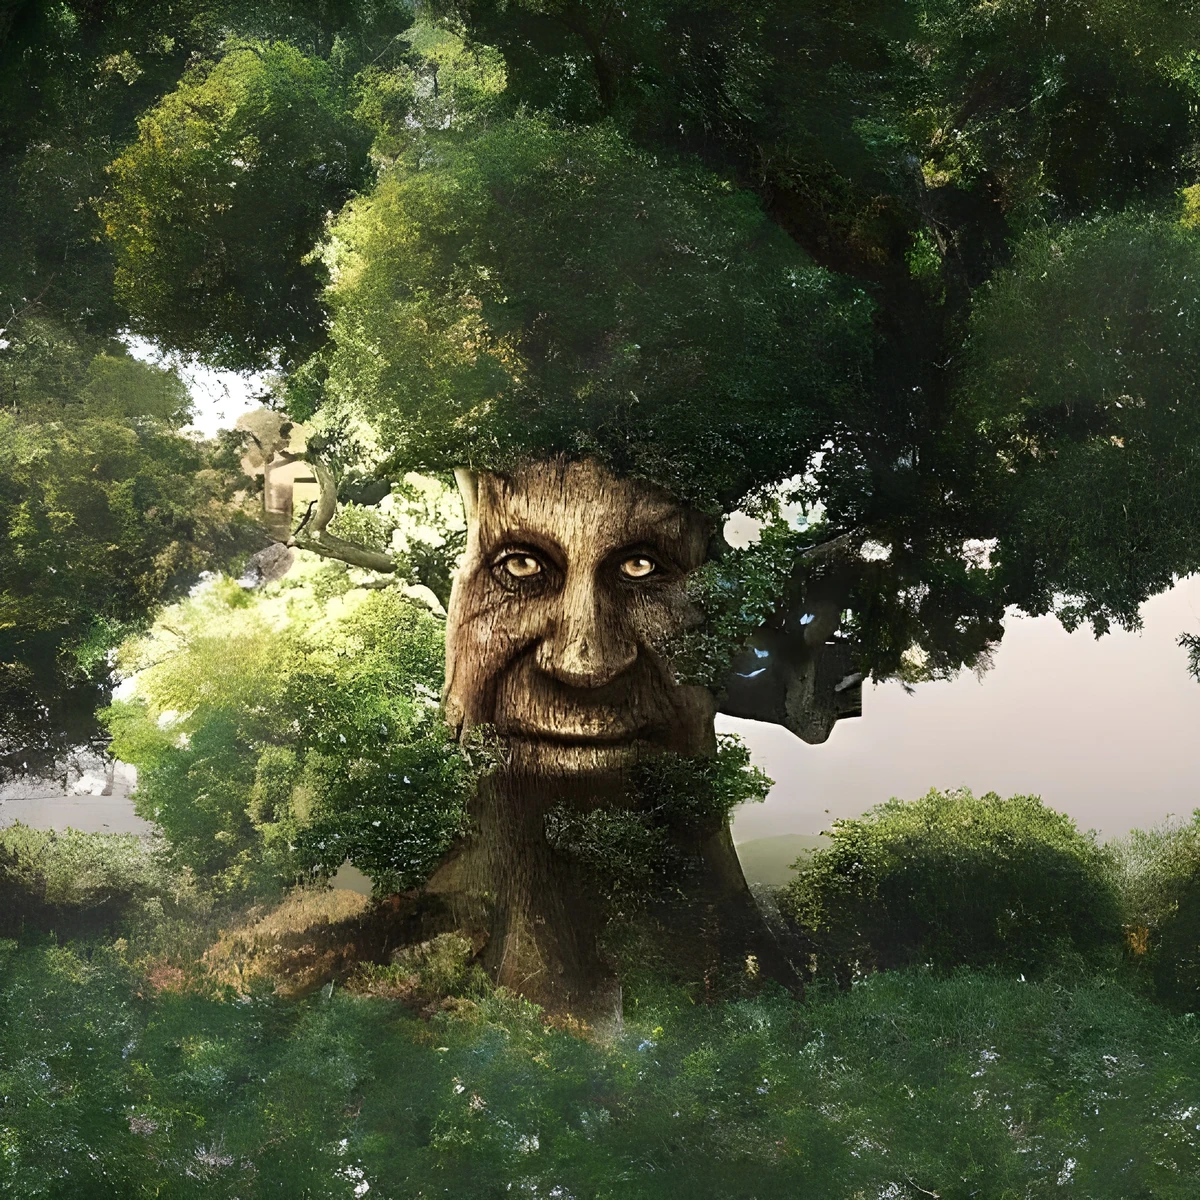

In [11]:
from IPython.display import Image
Image(filename='/data/notebook_files/TheWiseTree.png')